In [1]:
import shutil
import numpy as np
import io
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
import seaborn as sns

2024-11-30 12:59:55.305180: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9373] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-30 12:59:55.305218: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-30 12:59:55.306717: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1534] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-30 12:59:55.314670: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
#A folder called exported_models must be created in the evaluation folder where there will be all the exported 
#models from the low_level_classification and high_level_classification notebooks so that they can be tested inside
#the evaluation folder notebooks
def get_model():
    global model2
    model2 = load_model('./exported_models/NASNet_3class_low') #Or any other 3 class exported model
    print("Model 2 loaded successfully!")
get_model()

Model 2 loaded successfully!


In [18]:
#FOR CORRECT EVALUATION
#The test folder should contain only the test images split from each category folder from the Dataset_BUSI_with_GT folder
test_dir = './test'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(331, 331),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 522 images belonging to 3 classes.


In [10]:
predictions1 = model1.predict(test_generator)
class_predictions1 = (predictions1 > 0.5).astype(int).flatten()

# True labels from test generator
true_labels = test_generator.classes

22/22 [==============================] - 9s 427ms/step


In [19]:
predictions2 = model2.predict(test_generator)
class_predictions2 = predictions2.argmax(axis=1)

true_labels = test_generator.classes

17/17 [==============================] - 16s 379ms/step


In [11]:
final_class_predictions = []
for i in range(len(predictions1)):
    if (class_predictions1[i] == 0):
        if(class_predictions2[i] == 0):
            final_class_predictions.append(0)
        elif(class_predictions2[i] == 1):
            final_class_predictions.append(2)
        elif(class_predictions2[i] == 2):
            final_class_predictions.append(3)
    elif (class_predictions1[i] == 1):
            final_class_predictions.append(1)

In [ ]:
print("Predictions for test data (Predicted, True Label):")
for i in range(len(true_labels)):
    print(f"{final_class_predictions[i]}, {true_labels[i]}")

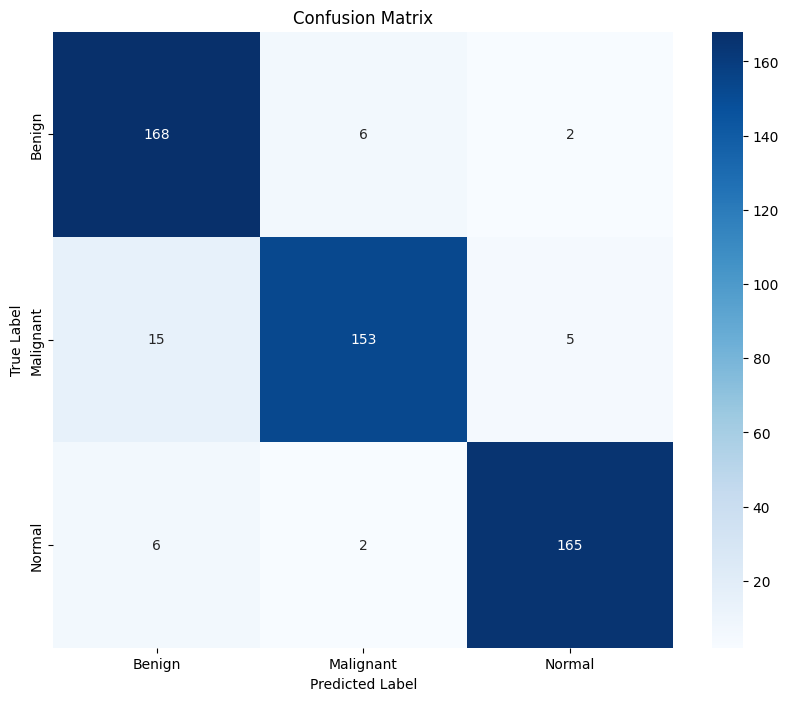

In [20]:
cm = confusion_matrix(true_labels, class_predictions2)
class_labels = ['Benign', 'Malignant', 'Normal']

#Confusion matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()